# **PROYEK PREDICTIVE ANALYTICS - RED WINE QUALITY PREDICTION** 

## Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           classification_report, confusion_matrix, roc_curve, roc_auc_score)
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Data Understanding

### Load Data

In [2]:
# Data Understanding - Load Data
file_path = './datasets/winequality-red.csv'
try:
    df = pd.read_csv(file_path, sep=';')
    print("Dataset loaded successfully!")
    print("Shape of dataset:", df.shape)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please check the file path.")

if 'df' in locals():
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    print("\nDataset Info:")
    df.info()

    print("\nDescriptive Statistics:")
    print(df.describe())

    print("\nChecking for missing values:")
    print(df.isnull().sum())
    
    print("\nChecking for duplicate rows:")
    print(df.duplicated().sum())
    
    print("\nUnique values in each column:")
    for column in df.columns:
        print(f"{column}: {df[column].nunique()} unique values")
    
    print("\nData types of each column:")
    print(df.dtypes)
else:
    print("Dataset could not be loaded. Please check the file path and try again.")

Dataset loaded successfully!
Shape of dataset: (1599, 12)

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

### EDA (Exploratory Data Analysis)

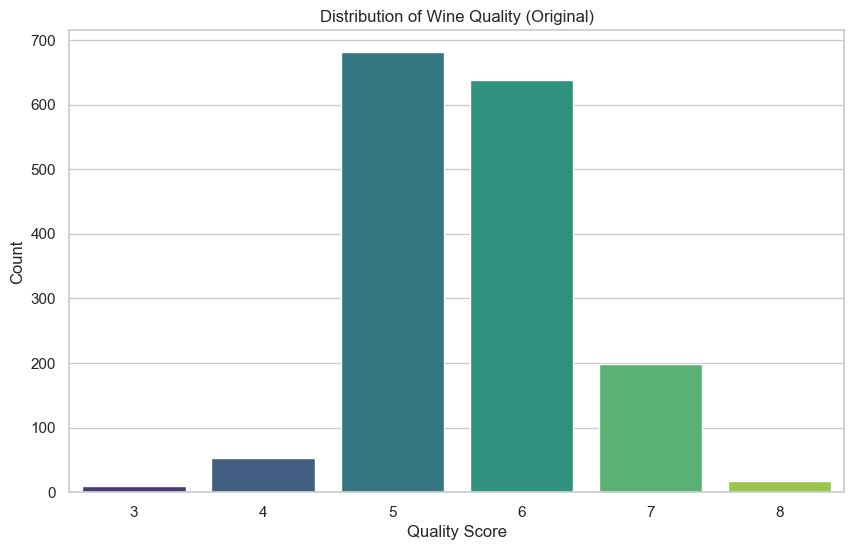

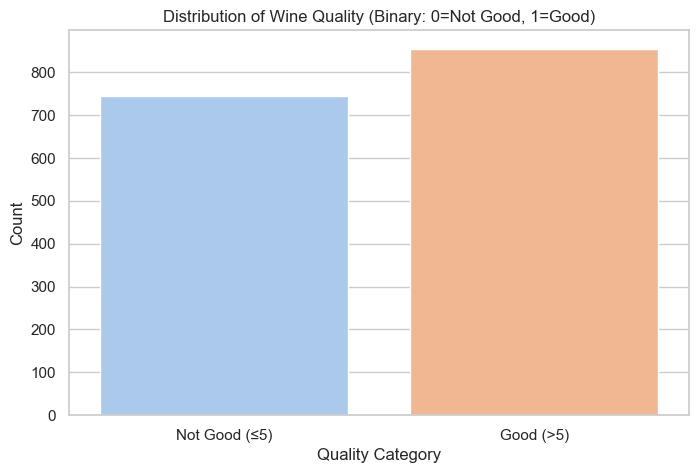


Value counts for 'quality_category':
quality_category
1    855
0    744
Name: count, dtype: int64
Class imbalance ratio (Not Good : Good): 0.87


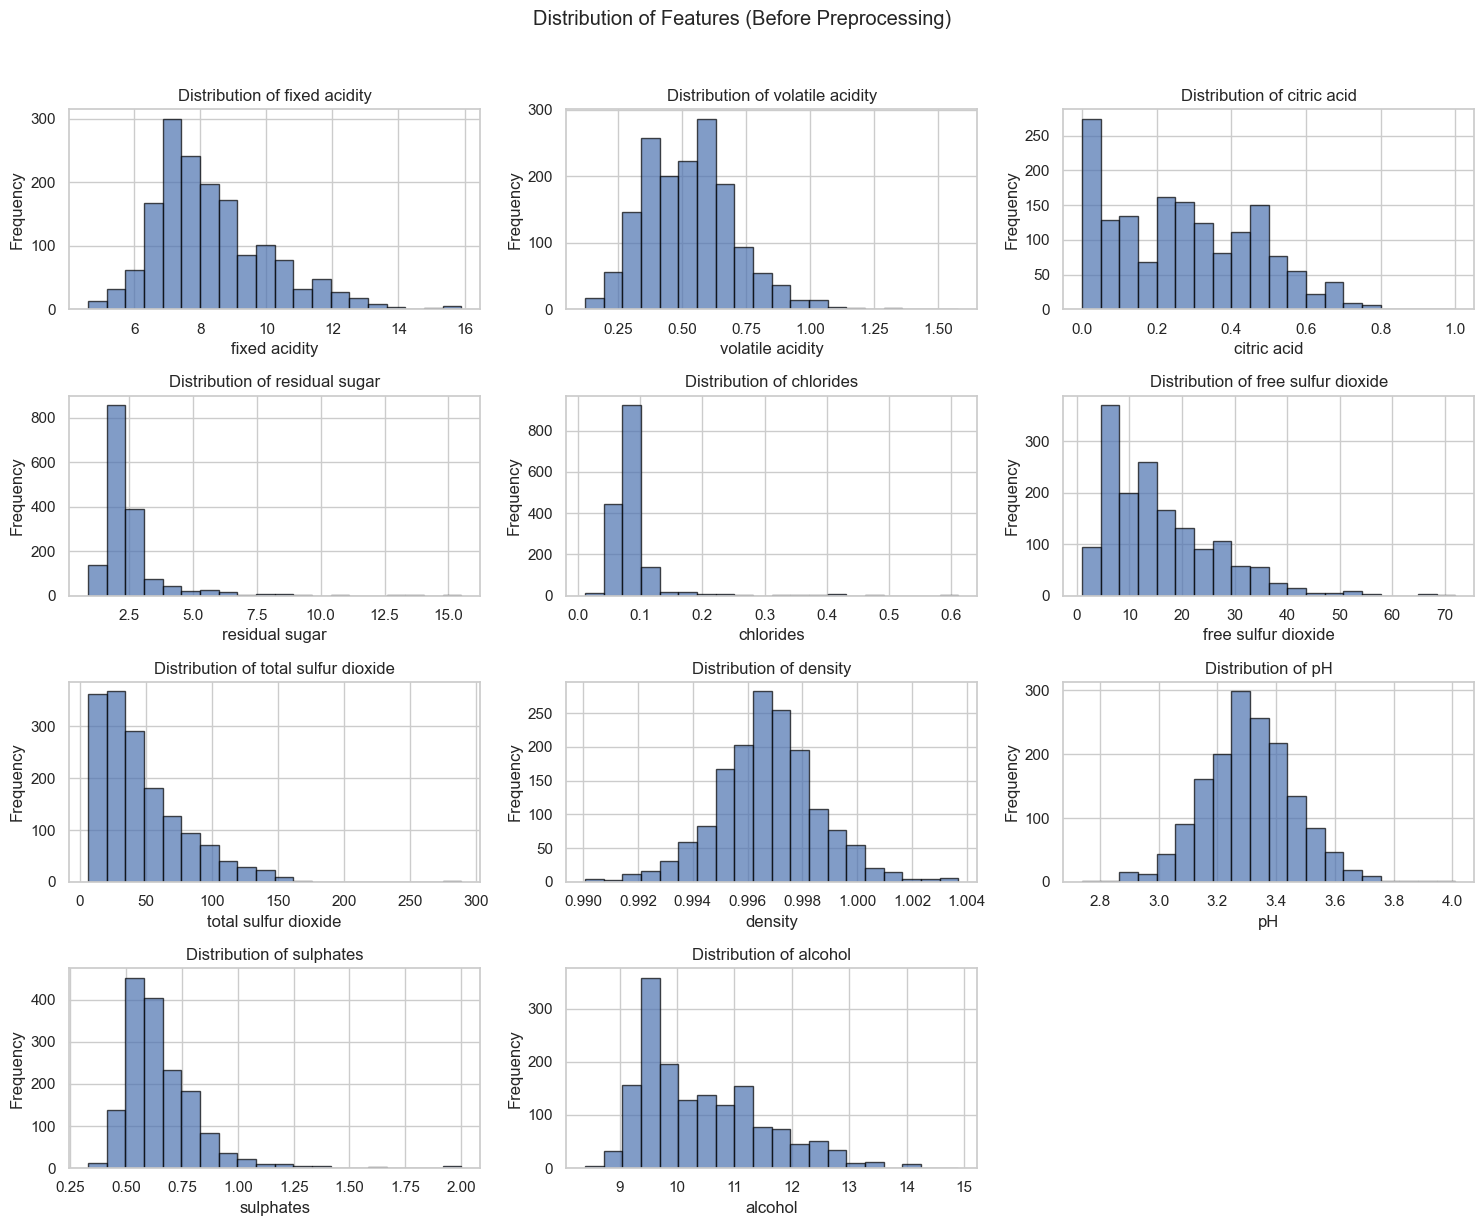

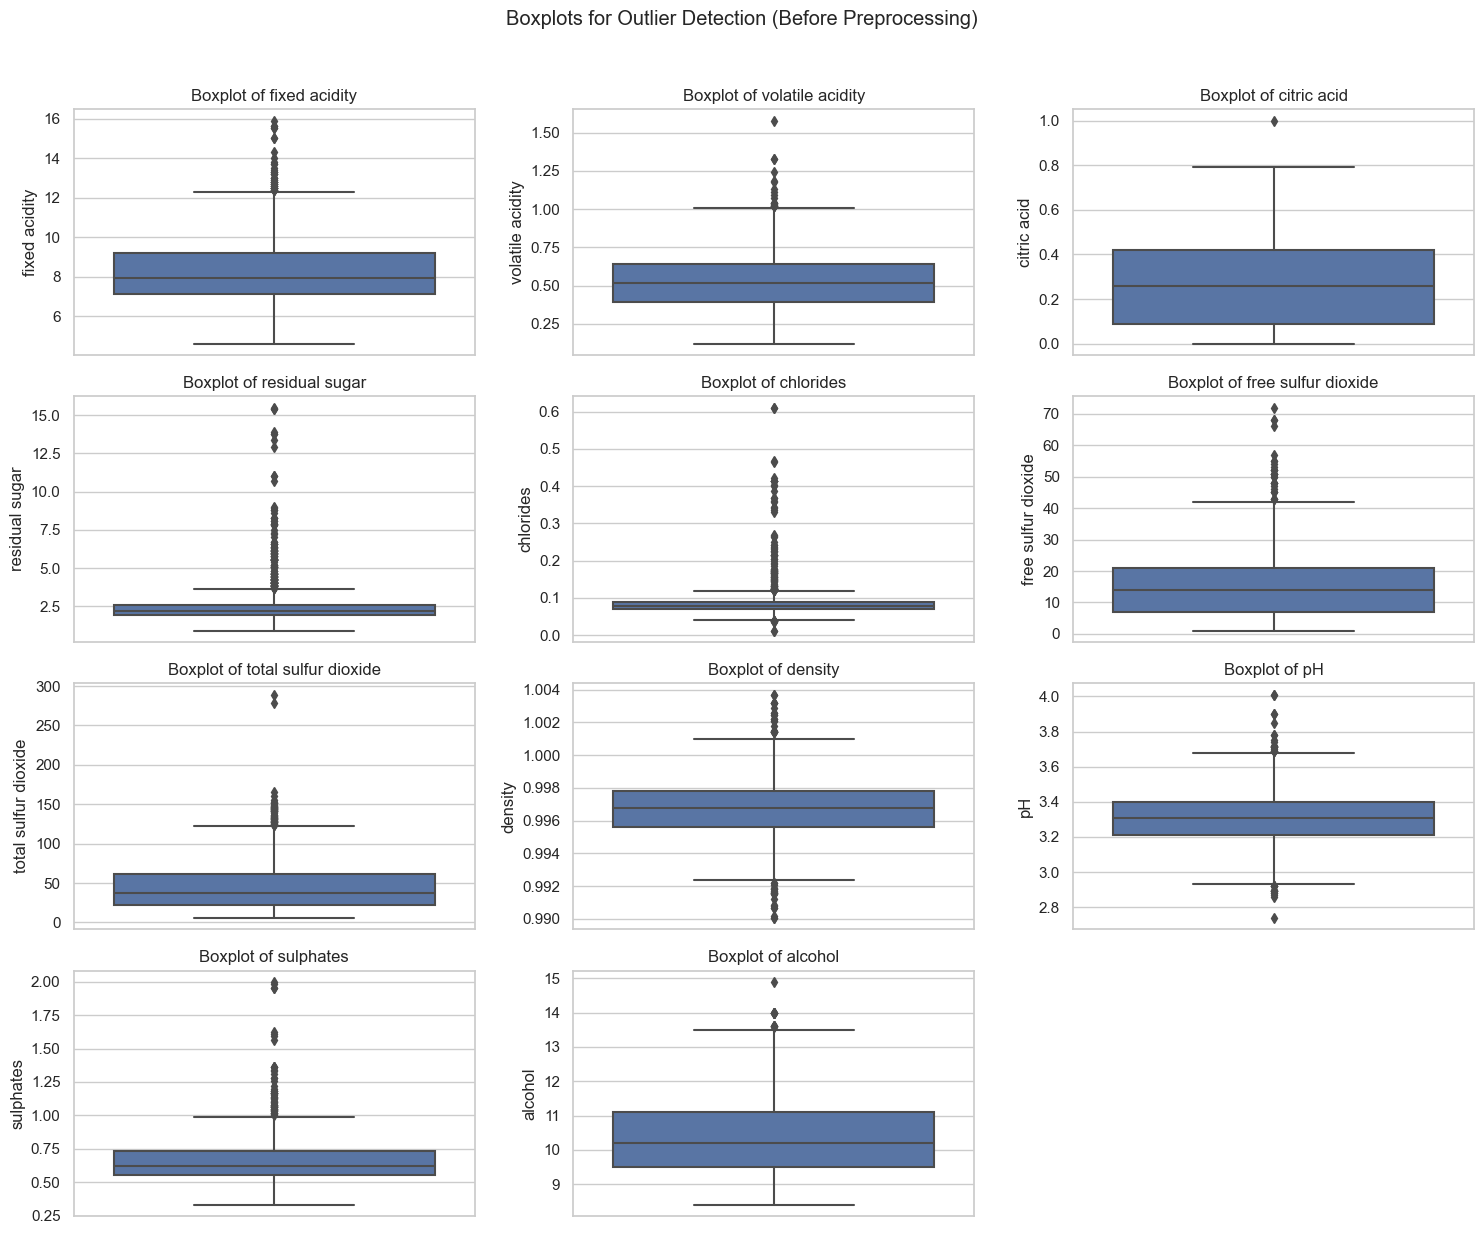

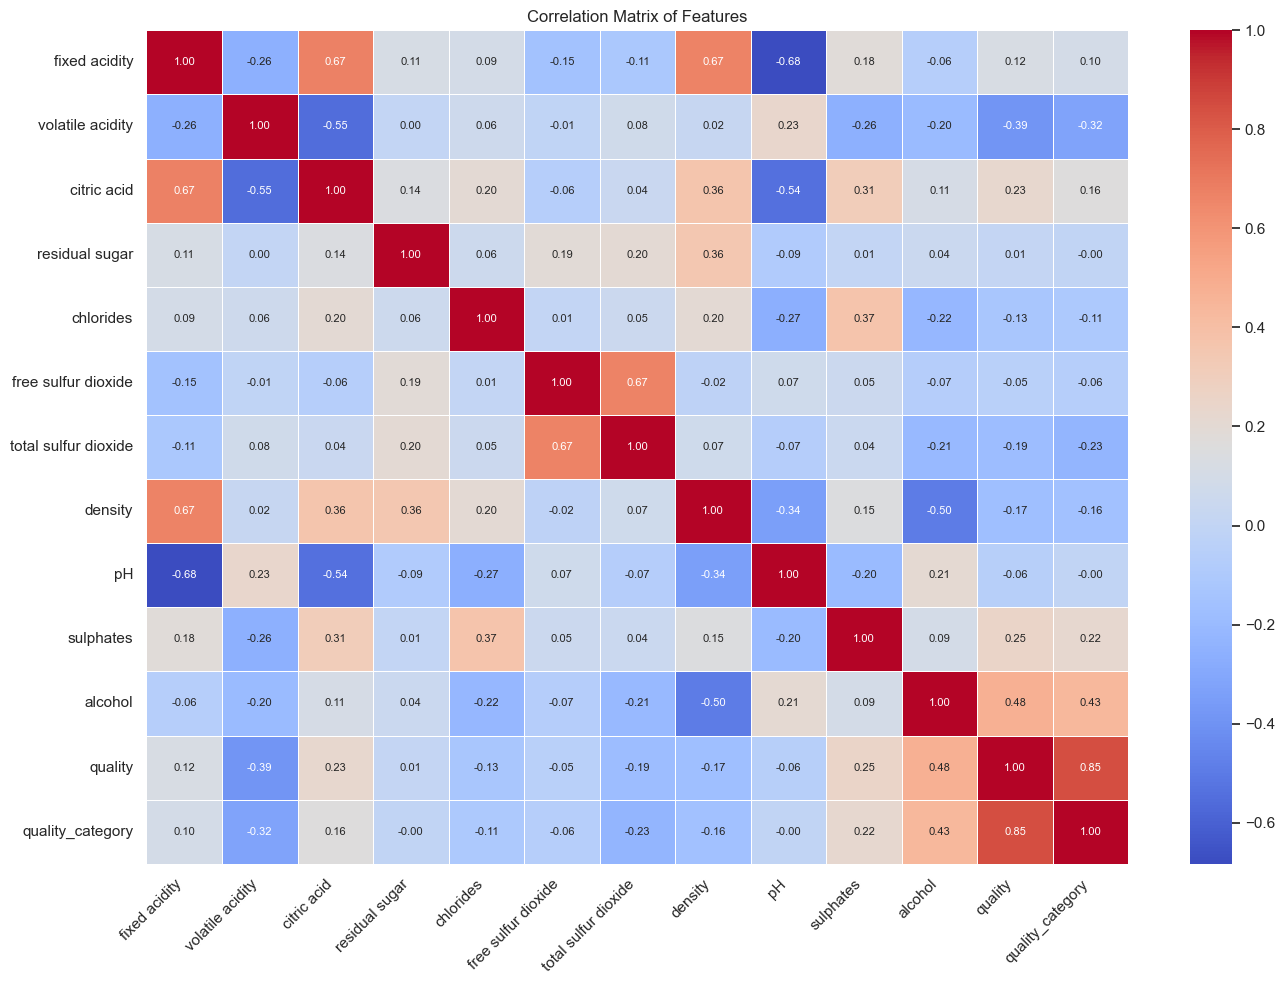

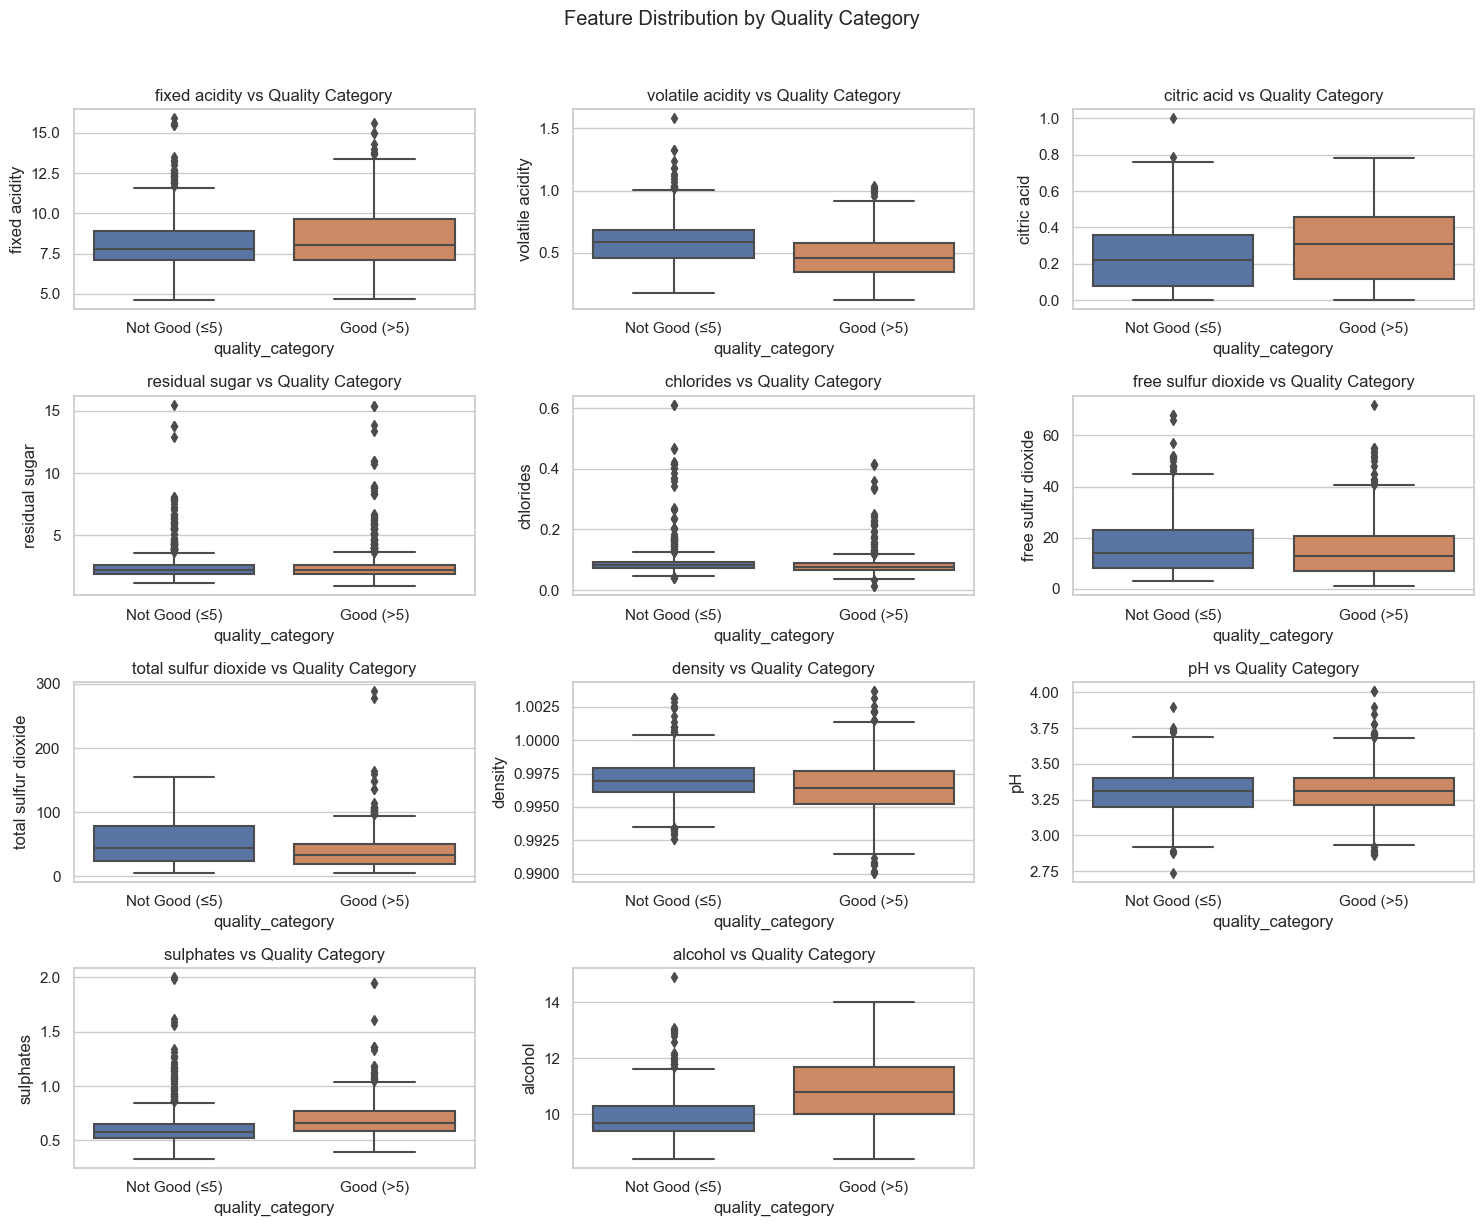

In [3]:
# EDA - Before Preprocessing
if 'df' in locals():
    # Distribusi variabel target 'quality' sebelum transformasi
    plt.figure(figsize=(10, 6))
    sns.countplot(x='quality', data=df, palette='viridis')
    plt.title('Distribution of Wine Quality (Original)')
    plt.xlabel('Quality Score')
    plt.ylabel('Count')
    plt.show()

    # Membuat kategori biner untuk 'quality'
    df['quality_category'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)
    
    # Distribusi variabel target setelah transformasi
    plt.figure(figsize=(8, 5))
    sns.countplot(x='quality_category', data=df, palette='pastel')
    plt.title('Distribution of Wine Quality (Binary: 0=Not Good, 1=Good)')
    plt.xlabel('Quality Category')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Not Good (≤5)', 'Good (>5)'])
    plt.show()
    
    print("\nValue counts for 'quality_category':")
    class_counts = df['quality_category'].value_counts()
    print(class_counts)
    print(f"Class imbalance ratio (Not Good : Good): {class_counts[0] / class_counts[1]:.2f}")

    # Distribusi fitur numerik
    numerical_features = df.select_dtypes(include=np.number).columns.tolist()
    features_for_hist = [col for col in numerical_features if col not in ['quality', 'quality_category']]
    
    if len(features_for_hist) > 0:
        fig, axes = plt.subplots(4, 3, figsize=(15, 12))
        axes = axes.ravel()
        
        for idx, feature in enumerate(features_for_hist):
            axes[idx].hist(df[feature], bins=20, edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'Distribution of {feature}')
            axes[idx].set_xlabel(feature)
            axes[idx].set_ylabel('Frequency')
        
        # Hide unused subplots
        for idx in range(len(features_for_hist), len(axes)):
            axes[idx].set_visible(False)
            
        plt.suptitle('Distribution of Features (Before Preprocessing)', y=1.02)
        plt.tight_layout()
        plt.show()

    # Boxplot untuk deteksi outliers
    fig, axes = plt.subplots(4, 3, figsize=(15, 12))
    axes = axes.ravel()
    
    for idx, feature in enumerate(features_for_hist):
        sns.boxplot(y=df[feature], ax=axes[idx])
        axes[idx].set_title(f'Boxplot of {feature}')
        
    for idx in range(len(features_for_hist), len(axes)):
        axes[idx].set_visible(False)
        
    plt.suptitle('Boxplots for Outlier Detection (Before Preprocessing)', y=1.02)
    plt.tight_layout()
    plt.show()

    # Korelasi antar fitur
    plt.figure(figsize=(14, 10))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
                linewidths=0.5, annot_kws={"size": 8})
    plt.title('Correlation Matrix of Features')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Hubungan fitur dengan target
    fig, axes = plt.subplots(4, 3, figsize=(15, 12))
    axes = axes.ravel()
    
    for idx, feature in enumerate(features_for_hist):
        sns.boxplot(x='quality_category', y=feature, data=df, ax=axes[idx])
        axes[idx].set_title(f'{feature} vs Quality Category')
        axes[idx].set_xticklabels(['Not Good (≤5)', 'Good (>5)'])
        
    for idx in range(len(features_for_hist), len(axes)):
        axes[idx].set_visible(False)
        
    plt.suptitle('Feature Distribution by Quality Category', y=1.02)
    plt.tight_layout()
    plt.show()

else:
    print("Dataset 'df' not loaded. Run previous cells.")

## Data Preparation

In [4]:
# Data Preparation
if 'df' in locals():
    print("=== DATA PREPARATION ===")
    
    # 1. Remove duplicates
    print(f"Number of rows before removing duplicates: {len(df)}")
    df_clean = df.drop_duplicates()
    print(f"Number of rows after removing duplicates: {len(df_clean)}")
    
    # 2. Outlier Detection and Treatment using IQR method
    print("\n=== OUTLIER DETECTION AND TREATMENT ===")
    features_to_clean = [col for col in df_clean.columns if col not in ['quality', 'quality_category']]
    
    # Calculate outliers before treatment
    outliers_before = {}
    for feature in features_to_clean:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_clean[(df_clean[feature] < lower_bound) | (df_clean[feature] > upper_bound)]
        outliers_before[feature] = len(outliers)
    
    print("Outliers count before treatment:")
    for feature, count in outliers_before.items():
        print(f"{feature}: {count} outliers")
    
    # Apply outlier capping (winsorization)
    df_processed = df_clean.copy()
    
    for feature in features_to_clean:
        Q1 = df_processed[feature].quantile(0.25)
        Q3 = df_processed[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers
        df_processed[feature] = np.where(df_processed[feature] < lower_bound, lower_bound, df_processed[feature])
        df_processed[feature] = np.where(df_processed[feature] > upper_bound, upper_bound, df_processed[feature])
    
    # Calculate outliers after treatment
    outliers_after = {}
    for feature in features_to_clean:
        Q1 = df_processed[feature].quantile(0.25)
        Q3 = df_processed[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_processed[(df_processed[feature] < lower_bound) | (df_processed[feature] > upper_bound)]
        outliers_after[feature] = len(outliers)
    
    print("\nOutliers count after treatment:")
    for feature, count in outliers_after.items():
        print(f"{feature}: {count} outliers")
    
    # 3. Final dataset preparation
    X = df_processed.drop(['quality', 'quality_category'], axis=1)
    y = df_processed['quality_category']
    
    print(f"\nFinal dataset shape: {df_processed.shape}")
    print("Features (X) and target (y) separated.")
    print("Shape of X:", X.shape)
    print("Shape of y:", y.shape)
    
    # Check class distribution after preprocessing
    print("\nClass distribution after preprocessing:")
    class_dist = y.value_counts(normalize=True)
    print(class_dist)
    
    # 4. Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"\nData split completed:")
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")
    print("\nClass distribution in training set:")
    print(y_train.value_counts(normalize=True))
    print("\nClass distribution in test set:")
    print(y_test.value_counts(normalize=True))
    
    # 5. Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert back to DataFrame for convenience
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    print("\nFeature scaling completed.")
    print("Scaling statistics (mean and std of training features after scaling):")
    print(f"Mean: {X_train_scaled_df.mean().round(6).tolist()}")
    print(f"Std: {X_train_scaled_df.std().round(6).tolist()}")
    
else:
    print("Dataset not available. Run previous cells.")

=== DATA PREPARATION ===
Number of rows before removing duplicates: 1599
Number of rows after removing duplicates: 1359

=== OUTLIER DETECTION AND TREATMENT ===
Outliers count before treatment:
fixed acidity: 41 outliers
volatile acidity: 19 outliers
citric acid: 1 outliers
residual sugar: 126 outliers
chlorides: 87 outliers
free sulfur dioxide: 26 outliers
total sulfur dioxide: 45 outliers
density: 35 outliers
pH: 28 outliers
sulphates: 55 outliers
alcohol: 12 outliers

Outliers count after treatment:
fixed acidity: 0 outliers
volatile acidity: 0 outliers
citric acid: 0 outliers
residual sugar: 0 outliers
chlorides: 0 outliers
free sulfur dioxide: 0 outliers
total sulfur dioxide: 0 outliers
density: 0 outliers
pH: 0 outliers
sulphates: 0 outliers
alcohol: 0 outliers

Final dataset shape: (1359, 13)
Features (X) and target (y) separated.
Shape of X: (1359, 11)
Shape of y: (1359,)

Class distribution after preprocessing:
quality_category
1    0.529065
0    0.470935
Name: proportion, dty

### EDA (Exploratory Data Analysis) - After Preprocessing

=== EDA AFTER PREPROCESSING ===


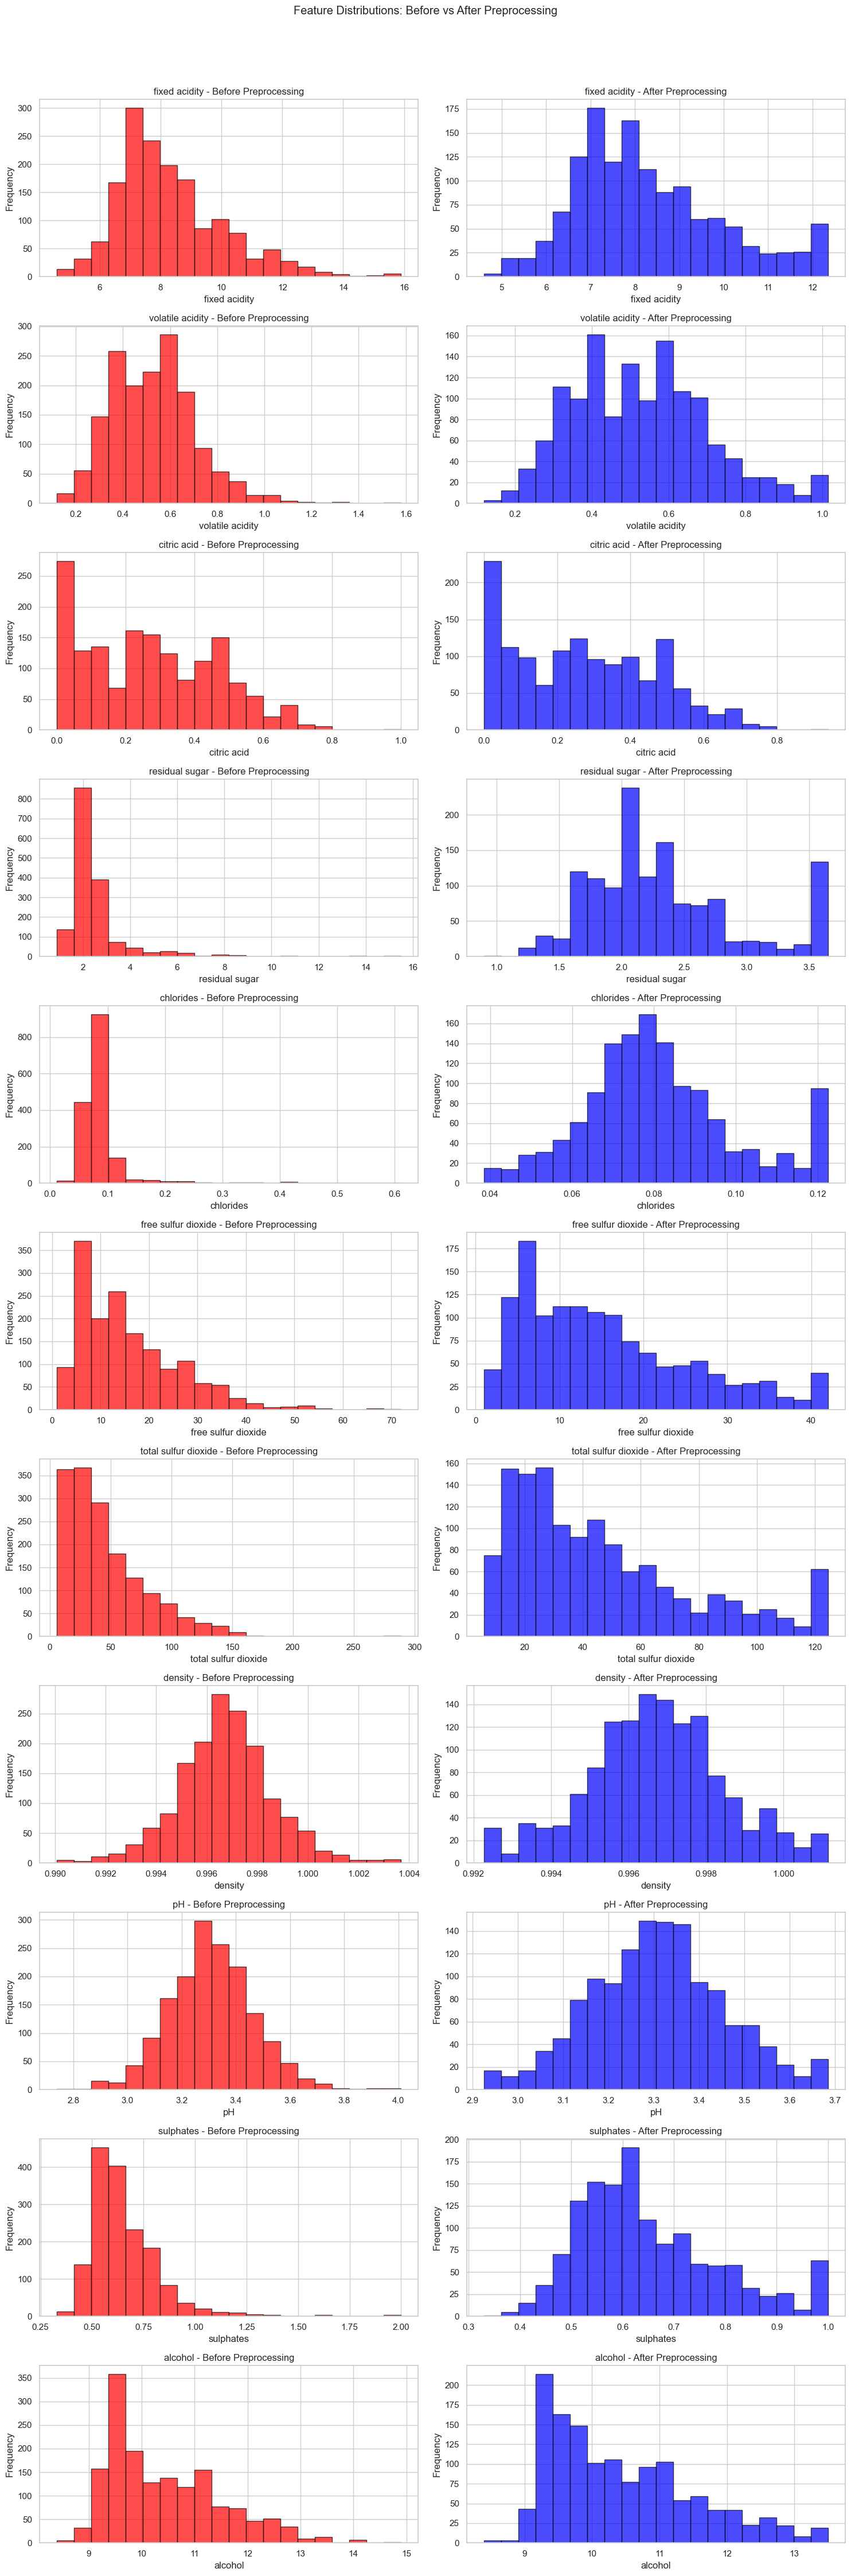

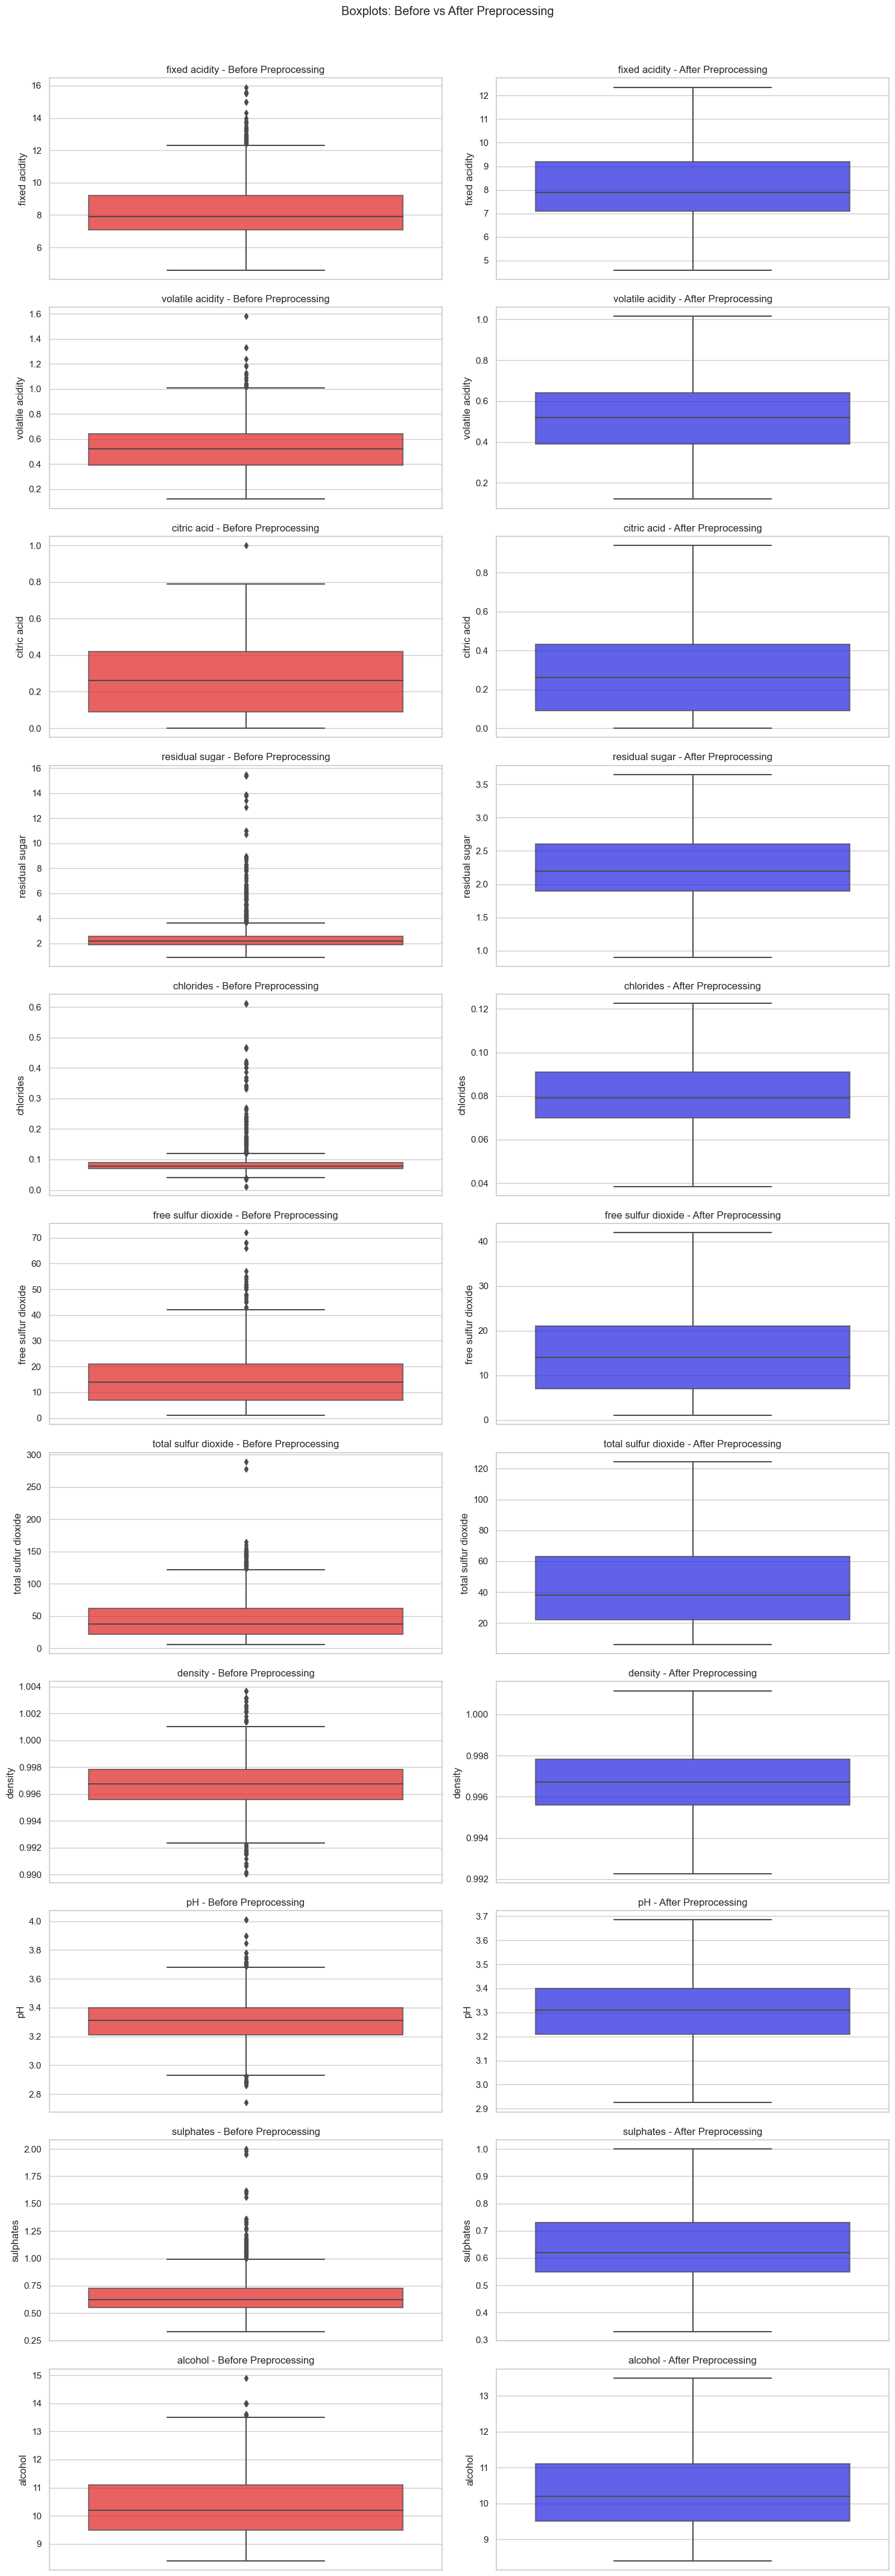

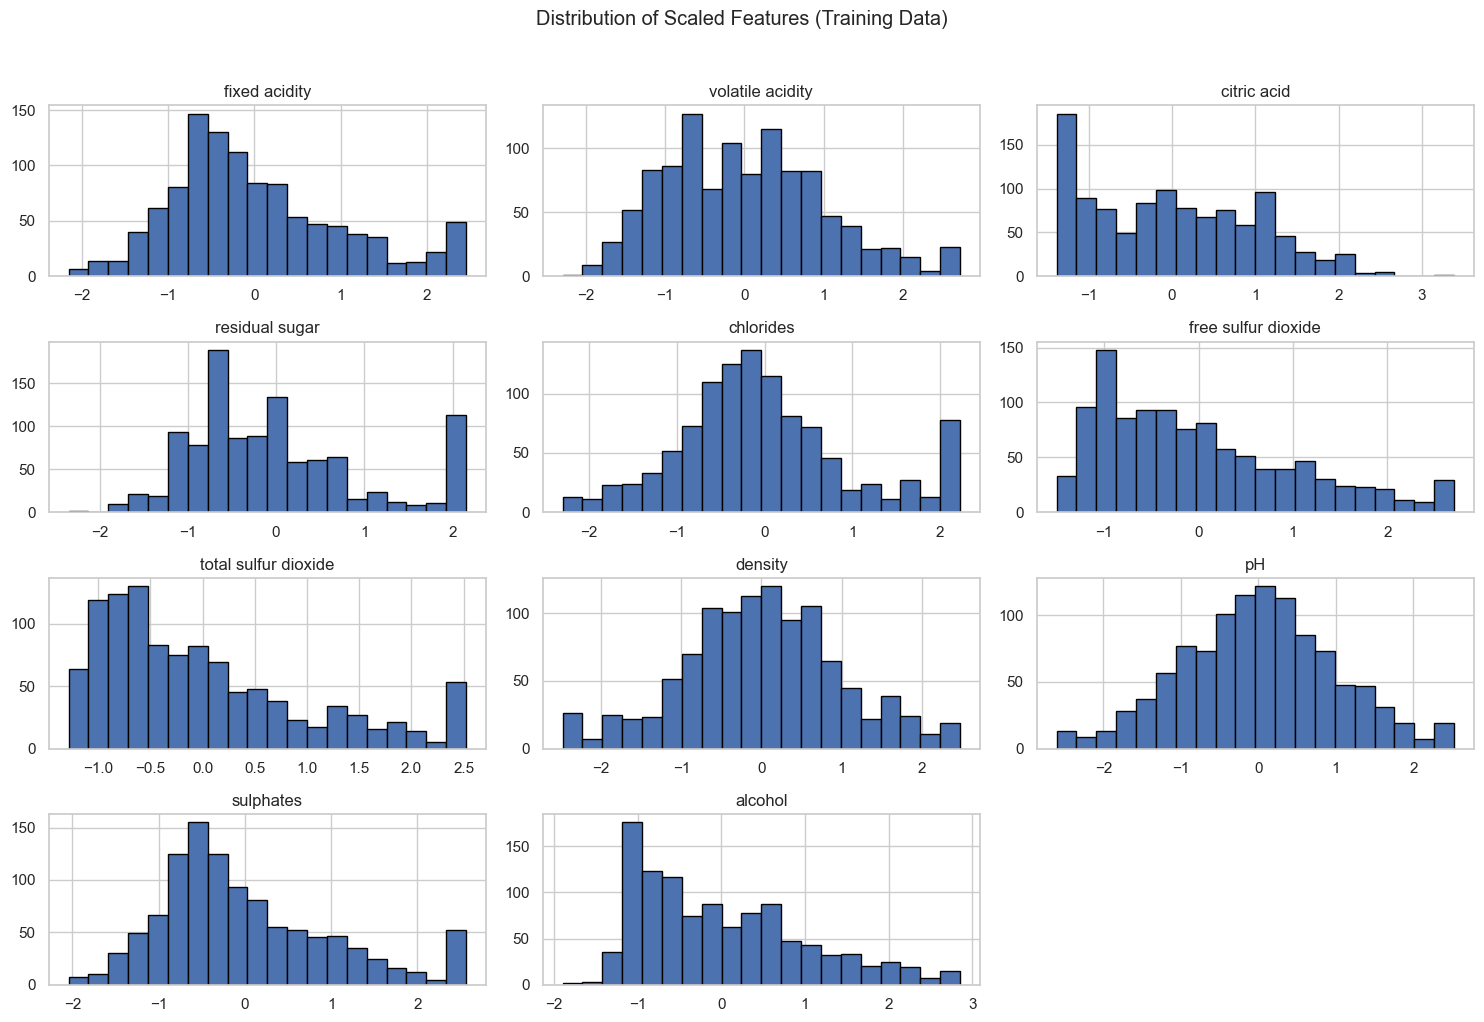

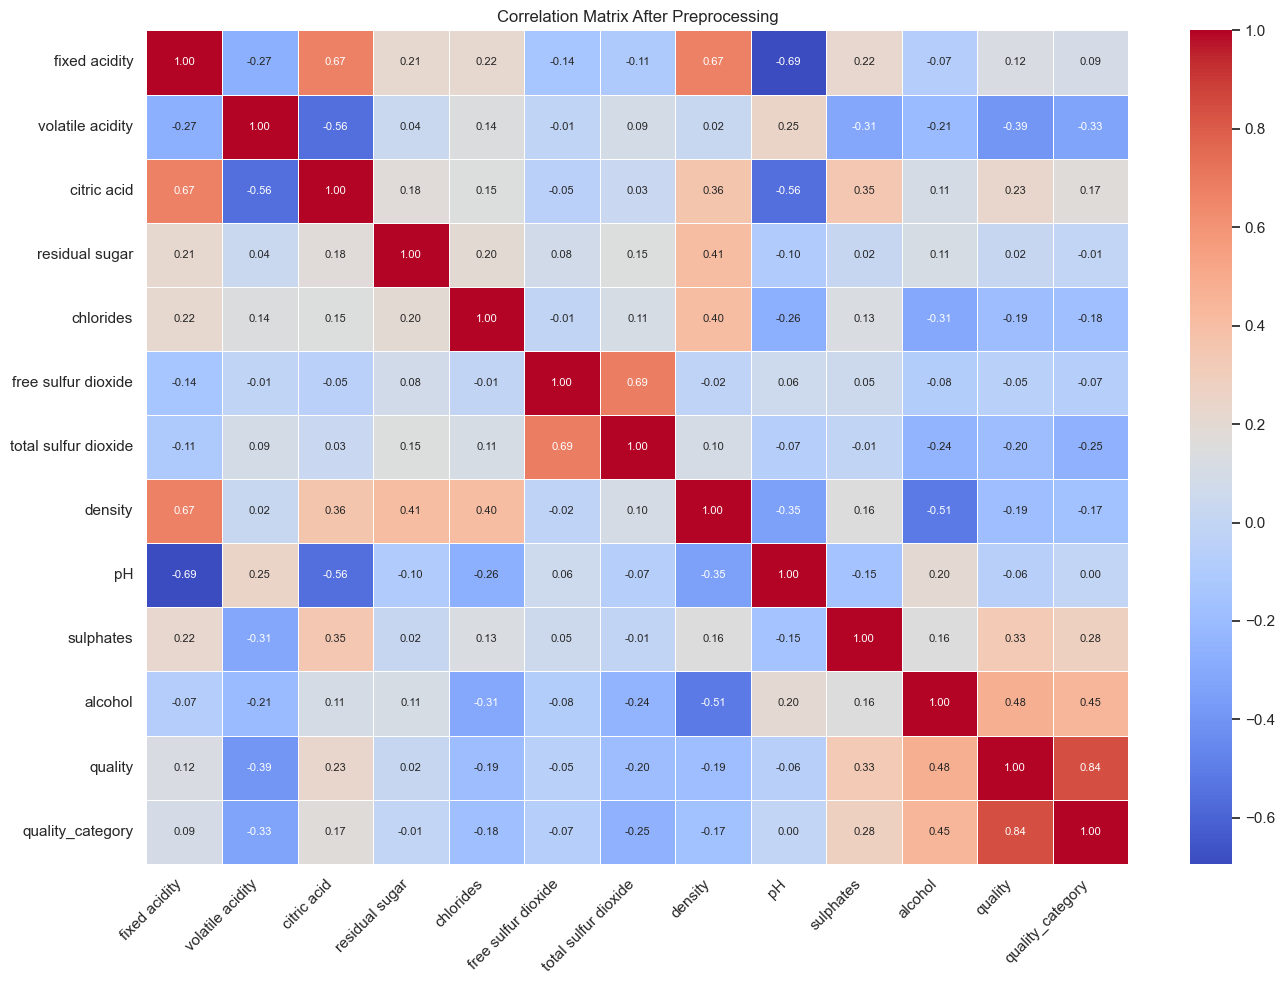

In [6]:
if 'df_processed' in locals():
    print("=== EDA AFTER PREPROCESSING ===")
    
    # Distribution comparison: Before vs After preprocessing
    features_to_compare = [col for col in df_processed.columns if col not in ['quality', 'quality_category']]
    
    # Create subplots for before/after comparison
    fig, axes = plt.subplots(len(features_to_compare), 2, figsize=(15, 4*len(features_to_compare)))
    
    for i, feature in enumerate(features_to_compare):
        # Before preprocessing
        axes[i, 0].hist(df[feature], bins=20, alpha=0.7, color='red', edgecolor='black')
        axes[i, 0].set_title(f'{feature} - Before Preprocessing')
        axes[i, 0].set_xlabel(feature)
        axes[i, 0].set_ylabel('Frequency')
        
        # After preprocessing
        axes[i, 1].hist(df_processed[feature], bins=20, alpha=0.7, color='blue', edgecolor='black')
        axes[i, 1].set_title(f'{feature} - After Preprocessing')
        axes[i, 1].set_xlabel(feature)
        axes[i, 1].set_ylabel('Frequency')
    
    plt.suptitle('Feature Distributions: Before vs After Preprocessing', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Boxplot comparison (Corrected Section)
    fig, axes = plt.subplots(len(features_to_compare), 2, figsize=(15, 4*len(features_to_compare)))
    
    for i, feature in enumerate(features_to_compare):
        # Before preprocessing
        sns.boxplot(y=df[feature], ax=axes[i, 0], color='red', boxprops={'alpha': 0.7})
        axes[i, 0].set_title(f'{feature} - Before Preprocessing')
        
        # After preprocessing
        sns.boxplot(y=df_processed[feature], ax=axes[i, 1], color='blue', boxprops={'alpha': 0.7})
        axes[i, 1].set_title(f'{feature} - After Preprocessing')
    
    plt.suptitle('Boxplots: Before vs After Preprocessing', y=1.0) # Adjusted y for better title placement
    plt.tight_layout(rect=[0, 0.03, 1, 0.99]) # Adjusted layout to prevent title overlap
    plt.show()
    
    # Distribution of scaled features
    X_train_scaled_df.hist(bins=20, figsize=(15, 10), layout=(4, 3), edgecolor='black')
    plt.suptitle('Distribution of Scaled Features (Training Data)', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Correlation matrix after preprocessing
    plt.figure(figsize=(14, 10))
    correlation_after = df_processed.corr()
    sns.heatmap(correlation_after, annot=True, cmap='coolwarm', fmt=".2f", 
                linewidths=0.5, annot_kws={"size": 8})
    plt.title('Correlation Matrix After Preprocessing')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
else:
    print("Processed dataset not available. Run previous cells.")

## Modeling

=== MODELING PHASE ===
Training Logistic Regression...

--- Logistic Regression Results ---
Training Accuracy: 0.7470
Test Accuracy: 0.7243
Test Precision (weighted): 0.7257
Test Recall (weighted): 0.7243
Test F1-score (weighted): 0.7245

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       128
           1       0.75      0.72      0.73       144

    accuracy                           0.72       272
   macro avg       0.72      0.72      0.72       272
weighted avg       0.73      0.72      0.72       272



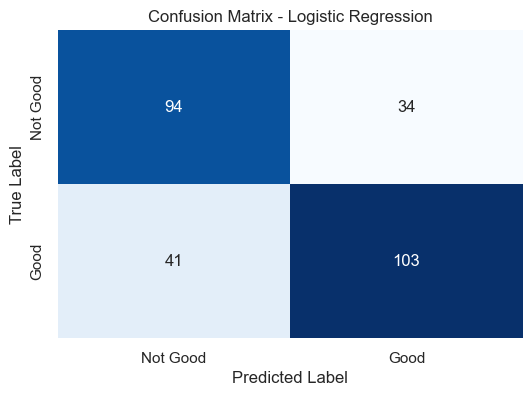


Training Random Forest (Default)...

--- Random Forest (Default) Results ---
Training Accuracy: 1.0000
Test Accuracy: 0.7610
Test Precision (weighted): 0.7624
Test Recall (weighted): 0.7610
Test F1-score (weighted): 0.7612

Classification Report - Random Forest (Default):
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       128
           1       0.79      0.75      0.77       144

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



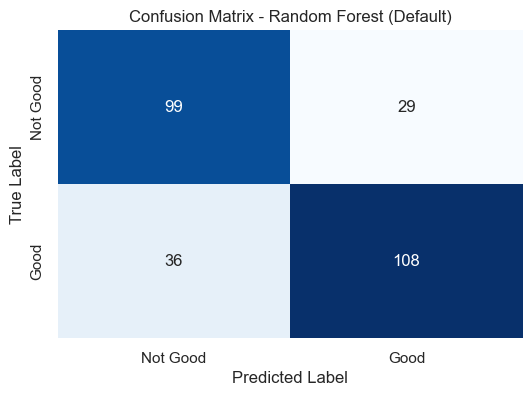

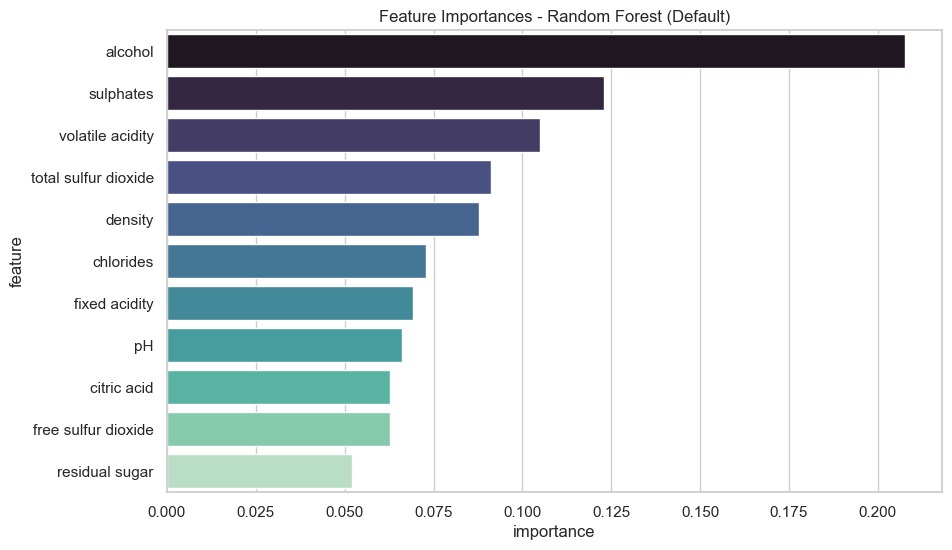


Training SVM...

--- SVM Results ---
Training Accuracy: 0.8050
Test Accuracy: 0.7721
Test Precision (weighted): 0.7745
Test Recall (weighted): 0.7721
Test F1-score (weighted): 0.7722

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       128
           1       0.81      0.75      0.78       144

    accuracy                           0.77       272
   macro avg       0.77      0.77      0.77       272
weighted avg       0.77      0.77      0.77       272



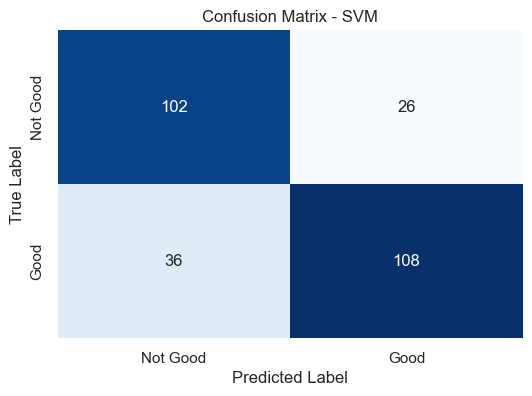

In [12]:
# Modeling
if 'X_train_scaled' in locals():
    print("=== MODELING PHASE ===")
    
    # Dictionary to store all models and their results
    models = {}
    results = {}
    
    # Function to evaluate and visualize model performance
    def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
        # Training predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        test_precision = precision_score(y_test, y_pred_test, average='weighted')
        test_recall = recall_score(y_test, y_pred_test, average='weighted')
        test_f1 = f1_score(y_test, y_pred_test, average='weighted')
        
        # Store results
        model_results = {
            'model': model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'test_recall': test_recall,
            'test_f1': test_f1,
            'y_pred_test': y_pred_test
        }
        
        # Print results
        print(f"\n--- {model_name} Results ---")
        print(f"Training Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {test_accuracy:.4f}")
        print(f"Test Precision (weighted): {test_precision:.4f}")
        print(f"Test Recall (weighted): {test_recall:.4f}")
        print(f"Test F1-score (weighted): {test_f1:.4f}")
        
        # Classification report
        print(f"\nClassification Report - {model_name}:")
        print(classification_report(y_test, y_pred_test))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Not Good', 'Good'], yticklabels=['Not Good', 'Good'])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
        
        return model_results
    
    # 1. Logistic Regression (Baseline)
    print("Training Logistic Regression...")
    log_reg = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    results['Logistic Regression'] = evaluate_model(
        log_reg, 'Logistic Regression', X_train_scaled, X_test_scaled, y_train, y_test
    )
    models['Logistic Regression'] = log_reg
    
    # 2. Random Forest (Default)
    print("\nTraining Random Forest (Default)...")
    rf_default = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_default.fit(X_train_scaled, y_train)
    results['Random Forest (Default)'] = evaluate_model(
        rf_default, 'Random Forest (Default)', X_train_scaled, X_test_scaled, y_train, y_test
    )
    models['Random Forest (Default)'] = rf_default
    
    # Feature importance for Random Forest
    importances = rf_default.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({
        'feature': feature_names, 
        'importance': importances
    }).sort_values(by='importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='mako')
    plt.title('Feature Importances - Random Forest (Default)')
    plt.show()
    
    # 3. SVM
    print("\nTraining SVM...")
    svm_model = SVC(random_state=42, kernel='rbf')
    svm_model.fit(X_train_scaled, y_train)
    results['SVM'] = evaluate_model(
        svm_model, 'SVM', X_train_scaled, X_test_scaled, y_train, y_test
    )
    models['SVM'] = svm_model
    
else:
    print("Scaled training data not available. Run previous cells.")

### Best Model Selection for Hyperparameter Tuning

=== BEST MODEL SELECTION ===
Best performing model: SVM
Best F1-score: 0.7722

=== HYPERPARAMETER TUNING FOR SVM ===
Starting hyperparameter tuning for SVM...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Hyperparameter tuning completed!
Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.7522

--- SVM (Tuned) Results ---
Training Accuracy: 0.7893
Test Accuracy: 0.7537
Test Precision (weighted): 0.7546
Test Recall (weighted): 0.7537
Test F1-score (weighted): 0.7539

Classification Report - SVM (Tuned):
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       128
           1       0.78      0.75      0.76       144

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272



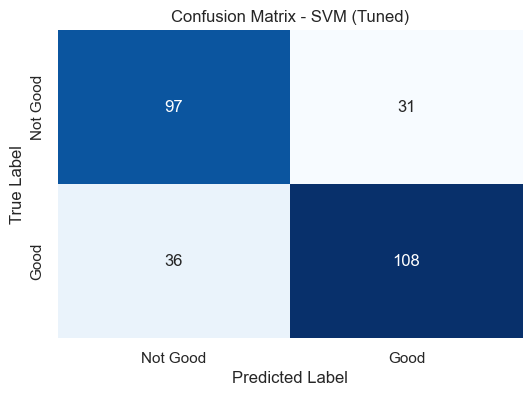

In [17]:
# Best Model Selection & Hyperparameter Tuning
if 'results' in locals():
    print("=== BEST MODEL SELECTION ===")
    
    # Select best model based on F1-score
    best_model_name = max(results.keys(), key=lambda x: results[x]['test_f1'])
    best_f1_score = results[best_model_name]['test_f1']
    
    print(f"Best performing model: {best_model_name}")
    print(f"Best F1-score: {best_f1_score:.4f}")
    
    # Hyperparameter tuning for the best model
    print(f"\n=== HYPERPARAMETER TUNING FOR {best_model_name.upper()} ===")
    
    if 'Random Forest' in best_model_name:
        print("Starting hyperparameter tuning for Random Forest...")
        
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        }
        
        base_model = RandomForestClassifier(random_state=42)
        
    elif 'Logistic Regression' in best_model_name:
        print("Starting hyperparameter tuning for Logistic Regression...")
        
        param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'max_iter': [1000, 2000]
        }
        
        base_model = LogisticRegression(random_state=42)
        
    elif 'SVM' in best_model_name:
        print("Starting hyperparameter tuning for SVM...")
        
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
        }
        
        base_model = SVC(random_state=42)
    
    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=5,
        scoring='f1_weighted',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    print(f"\nHyperparameter tuning completed!")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    
    # Evaluate tuned model
    best_tuned_model = grid_search.best_estimator_
    tuned_model_name = f"{best_model_name} (Tuned)"
    
    results[tuned_model_name] = evaluate_model(
        best_tuned_model, tuned_model_name, X_train_scaled, X_test_scaled, y_train, y_test
    )
    models[tuned_model_name] = best_tuned_model
    
    # Feature importance for tuned Random Forest (if applicable)
    if 'Random Forest' in best_model_name:
        tuned_importances = best_tuned_model.feature_importances_
        tuned_importance_df = pd.DataFrame({
            'feature': feature_names, 
            'importance': tuned_importances
        }).sort_values(by='importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=tuned_importance_df, palette='viridis')
        plt.title('Feature Importances - Random Forest (Tuned)')
        plt.show()
        
        print("\nTop 5 Most Important Features (Tuned Model):")
        print(tuned_importance_df.head())
    
else:
    print("Model results not available. Run previous cells.")

## Final Evaluation and Comparison

=== FINAL MODEL COMPARISON ===
Complete Model Performance Comparison:
                  Model  Train Accuracy  Test Accuracy  Test Precision  Test Recall  Test F1-Score
    Logistic Regression          0.7470         0.7243          0.7257       0.7243         0.7245
Random Forest (Default)          1.0000         0.7610          0.7624       0.7610         0.7612
                    SVM          0.8050         0.7721          0.7745       0.7721         0.7722
            SVM (Tuned)          0.7893         0.7537          0.7546       0.7537         0.7539


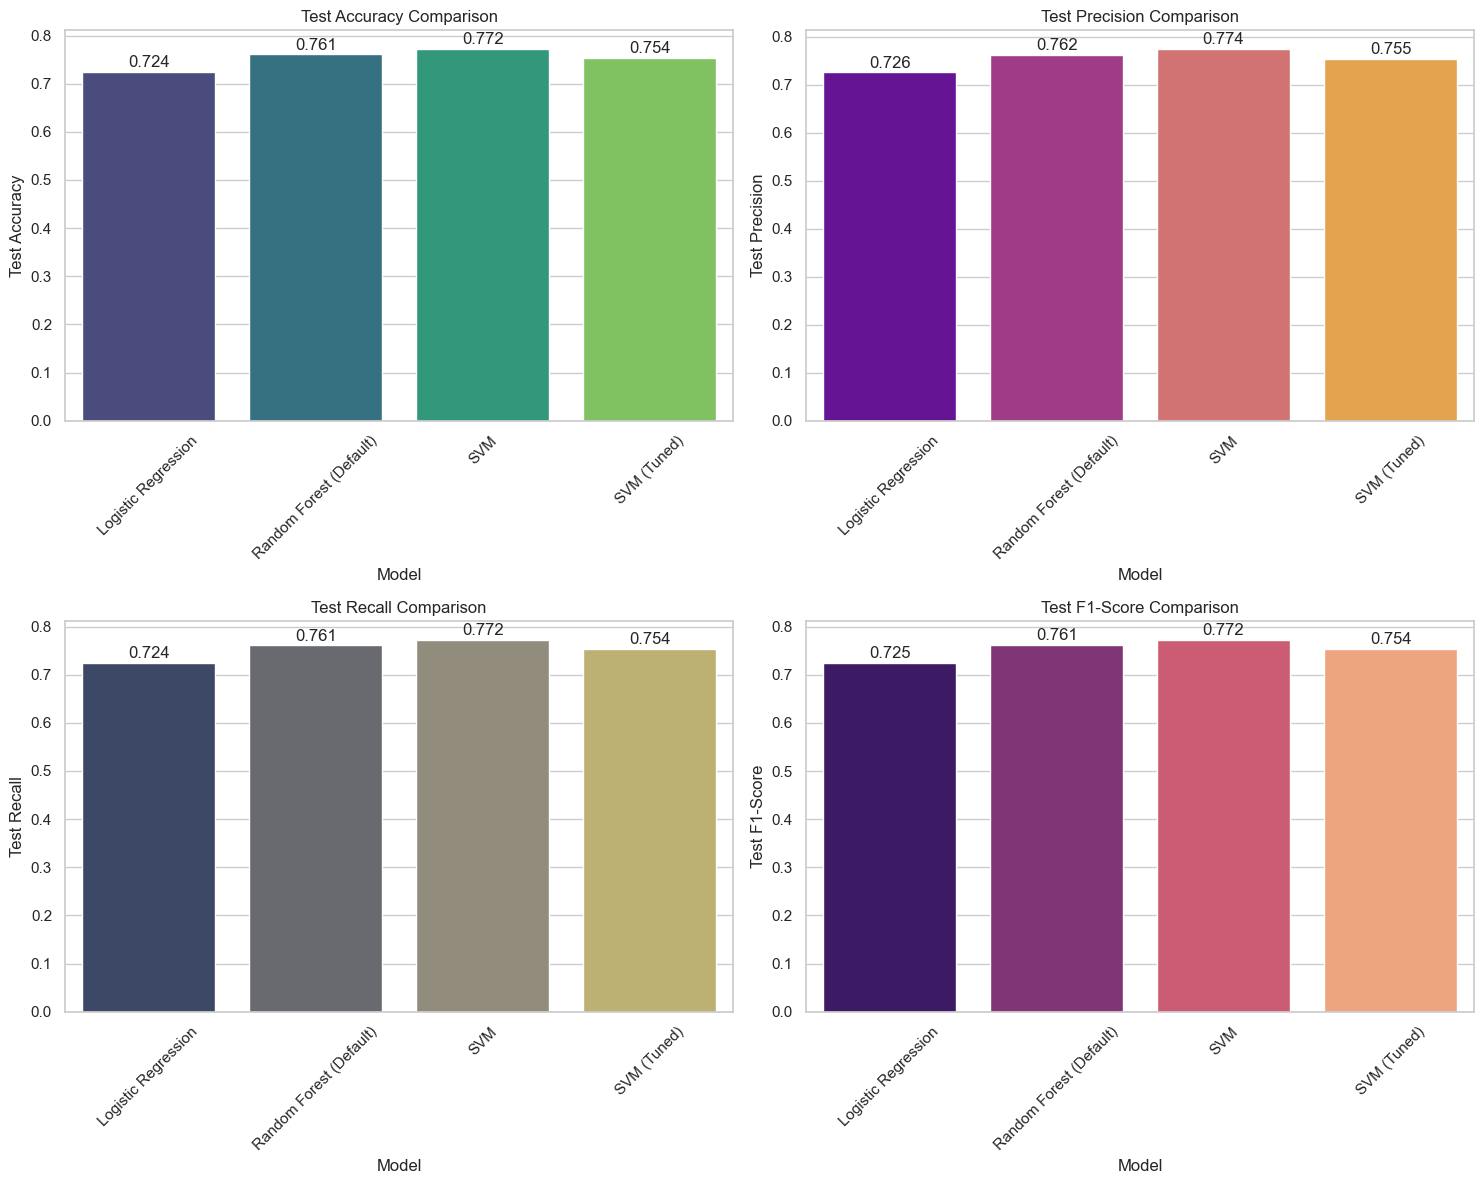


🏆 FINAL BEST MODEL: SVM
🏆 BEST F1-SCORE: 0.7722
📈 IMPROVEMENT OVER BASELINE: 6.58%

=== MODEL ANALYSIS ===
Logistic Regression:
  - Overfitting indicator: 0.0227
  - Generalization: Good
Random Forest (Default):
  - Overfitting indicator: 0.2390
  - Generalization: Poor
SVM:
  - Overfitting indicator: 0.0329
  - Generalization: Good
SVM (Tuned):
  - Overfitting indicator: 0.0357
  - Generalization: Good


In [18]:
# Final Evaluation and Comparison
if 'results' in locals():
    print("=== FINAL MODEL COMPARISON ===")
    
    # Create comprehensive results dataframe
    comparison_data = []
    for model_name, result in results.items():
        comparison_data.append({
            'Model': model_name,
            'Train Accuracy': result['train_accuracy'],
            'Test Accuracy': result['test_accuracy'],
            'Test Precision': result['test_precision'],
            'Test Recall': result['test_recall'],
            'Test F1-Score': result['test_f1']
        })
    
    results_df = pd.DataFrame(comparison_data)
    results_df = results_df.round(4)
    
    print("Complete Model Performance Comparison:")
    print(results_df.to_string(index=False))
    
    # Visualization of model comparison
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Test Accuracy
    sns.barplot(data=results_df, x='Model', y='Test Accuracy', ax=axes[0,0], palette='viridis')
    axes[0,0].set_title('Test Accuracy Comparison')
    axes[0,0].tick_params(axis='x', rotation=45)
    for i, v in enumerate(results_df['Test Accuracy']):
        axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    # Test Precision
    sns.barplot(data=results_df, x='Model', y='Test Precision', ax=axes[0,1], palette='plasma')
    axes[0,1].set_title('Test Precision Comparison')
    axes[0,1].tick_params(axis='x', rotation=45)
    for i, v in enumerate(results_df['Test Precision']):
        axes[0,1].text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    # Test Recall
    sns.barplot(data=results_df, x='Model', y='Test Recall', ax=axes[1,0], palette='cividis')
    axes[1,0].set_title('Test Recall Comparison')
    axes[1,0].tick_params(axis='x', rotation=45)
    for i, v in enumerate(results_df['Test Recall']):
        axes[1,0].text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    # Test F1-Score
    sns.barplot(data=results_df, x='Model', y='Test F1-Score', ax=axes[1,1], palette='magma')
    axes[1,1].set_title('Test F1-Score Comparison')
    axes[1,1].tick_params(axis='x', rotation=45)
    for i, v in enumerate(results_df['Test F1-Score']):
        axes[1,1].text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Overall best model
    final_best_model = results_df.loc[results_df['Test F1-Score'].idxmax(), 'Model']
    final_best_f1 = results_df['Test F1-Score'].max()
    
    print(f"\n🏆 FINAL BEST MODEL: {final_best_model}")
    print(f"🏆 BEST F1-SCORE: {final_best_f1:.4f}")
    
    # Performance improvement summary
    if len(results_df) > 1:
        baseline_f1 = results_df.iloc[0]['Test F1-Score']  # Assuming first model is baseline
        improvement = ((final_best_f1 - baseline_f1) / baseline_f1) * 100
        print(f"📈 IMPROVEMENT OVER BASELINE: {improvement:.2f}%")
    
    # Model complexity vs performance trade-off analysis
    print(f"\n=== MODEL ANALYSIS ===")
    for model_name, result in results.items():
        overfitting = result['train_accuracy'] - result['test_accuracy']
        print(f"{model_name}:")
        print(f"  - Overfitting indicator: {overfitting:.4f}")
        print(f"  - Generalization: {'Good' if overfitting < 0.05 else 'Moderate' if overfitting < 0.1 else 'Poor'}")
    
else:
    print("Results not available. Run previous cells.")

### Model Interpretation and Insights

In [ ]:
# Model Interpretation and Insights
if 'results' in locals() and 'df_processed' in locals():
    print("=== MODEL INTERPRETATION AND INSIGHTS ===")
    
    # Get the final best model
    final_best_model_name = results_df.loc[results_df['Test F1-Score'].idxmax(), 'Model']
    final_best_model_obj = models[final_best_model_name]
    
    print(f"Analyzing insights from: {final_best_model_name}")
    
    # Feature importance analysis (for tree-based models)
    if hasattr(final_best_model_obj, 'feature_importances_'):
        importances = final_best_model_obj.feature_importances_
        feature_importance_df = pd.DataFrame({
            'feature': X.columns,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print("\nTop 5 Most Important Features:")
        print(feature_importance_df.head())
        
        # Correlation between top features and target
        top_features = feature_importance_df.head(5)['feature'].tolist()
        
        plt.figure(figsize=(12, 8))
        for i, feature in enumerate(top_features):
            plt.subplot(2, 3, i+1)
            sns.boxplot(x='quality_category', y=feature, data=df_processed)
            plt.title(f'{feature} vs Quality')
            plt.xlabel('Quality Category')
            plt.xticks([0, 1], ['Not Good', 'Good'])
        
        plt.tight_layout()
        plt.suptitle('Top 5 Most Important Features vs Quality', y=1.02)
        plt.show()
                     

=== MODEL INTERPRETATION AND INSIGHTS ===
Analyzing insights from: SVM

Model SVM tidak memiliki atribut 'feature_importances_' atau 'coef_'. Analisis kepentingan fitur standar tidak dapat diterapkan secara langsung.

### Wawasan Tambahan (Contoh):
1. **Alkohol**: Seringkali menjadi salah satu prediktor utama kualitas anggur. Anggur dengan kualitas lebih tinggi mungkin memiliki kadar alkohol yang sedikit lebih tinggi atau lebih seimbang.
2. **Volatile Acidity**: Kadar asam volatil yang terlalu tinggi biasanya dianggap sebagai cacat pada anggur, sehingga mungkin berkorelasi negatif dengan kualitas.
3. **Sulphates**: Dapat bertindak sebagai antioksidan dan antimikroba, yang mungkin berkontribusi positif terhadap kualitas jika dalam kadar yang tepat.
4. **Citric Acid**: Dapat menambah kesegaran dan rasa buah pada anggur, seringkali ditemukan lebih tinggi pada anggur berkualitas baik.

Catatan: Wawasan spesifik mengenai hubungan fitur dengan kualitas sebaiknya ditarik setelah mengamati plo

In [23]:
print("=======================================================")
print("--- Detailed Explanation of Metrics ---")
print("=======================================================")
print("""
- Akurasi (Accuracy): Proporsi total prediksi yang benar.
  Formula: (TP + TN) / (TP + TN + FP + FN).
  Cara kerja: Memberikan gambaran umum seberapa sering model benar. Bisa menyesatkan jika kelas tidak seimbang.

- Presisi (Precision): Dari semua yang diprediksi sebagai kelas positif, berapa banyak yang benar-benar positif.
  Formula untuk kelas positif: TP / (TP + FP).
  Cara kerja: Presisi tinggi berarti model jarang salah mengklasifikasikan sampel negatif sebagai positif (rendah False Positive).
  (Weighted average memperhitungkan presisi untuk setiap kelas dan mengambil rata-ratanya berdasarkan jumlah sampel per kelas).

- Recall (Sensitivity): Dari semua yang sebenarnya kelas positif, berapa banyak yang berhasil diprediksi sebagai positif.
  Formula untuk kelas positif: TP / (TP + FN).
  Cara kerja: Recall tinggi berarti model mampu menemukan sebagian besar sampel positif (rendah False Negative).
  (Weighted average memperhitungkan recall untuk setiap kelas).

- F1-score: Rata-rata harmonik dari Presisi dan Recall.
  Formula: 2 * (Precision * Recall) / (Precision + Recall).
  Cara kerja: Memberikan keseimbangan antara presisi dan recall, berguna terutama jika ada ketidakseimbangan kelas atau jika kedua metrik (presisi dan recall) sama pentingnya.
  (Weighted average memperhitungkan F1-score untuk setiap kelas).

- Confusion Matrix: Tabel yang menggambarkan performa model klasifikasi. Baris merepresentasikan kelas aktual, kolom merepresentasikan kelas prediksi.
  - TP (True Positive): Sampel positif yang diprediksi benar.
  - TN (True Negative): Sampel negatif yang diprediksi benar.
  - FP (False Positive): Sampel negatif yang salah diprediksi sebagai positif (Type I Error).
  - FN (False Negative): Sampel positif yang salah diprediksi sebagai negatif (Type II Error).
""")

--- Detailed Explanation of Metrics ---

- Akurasi (Accuracy): Proporsi total prediksi yang benar.
  Formula: (TP + TN) / (TP + TN + FP + FN).
  Cara kerja: Memberikan gambaran umum seberapa sering model benar. Bisa menyesatkan jika kelas tidak seimbang.

- Presisi (Precision): Dari semua yang diprediksi sebagai kelas positif, berapa banyak yang benar-benar positif.
  Formula untuk kelas positif: TP / (TP + FP).
  Cara kerja: Presisi tinggi berarti model jarang salah mengklasifikasikan sampel negatif sebagai positif (rendah False Positive).
  (Weighted average memperhitungkan presisi untuk setiap kelas dan mengambil rata-ratanya berdasarkan jumlah sampel per kelas).

- Recall (Sensitivity): Dari semua yang sebenarnya kelas positif, berapa banyak yang berhasil diprediksi sebagai positif.
  Formula untuk kelas positif: TP / (TP + FN).
  Cara kerja: Recall tinggi berarti model mampu menemukan sebagian besar sampel positif (rendah False Negative).
  (Weighted average memperhitungkan recall